In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions

In [4]:
df=pd.read_csv(r'F:\Deep Learning Assignments\Assignment-4\Multiple CSV\9.random.csv',header=None)

In [5]:
df.head()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [6]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype('int')

<Axes: xlabel='0', ylabel='1'>

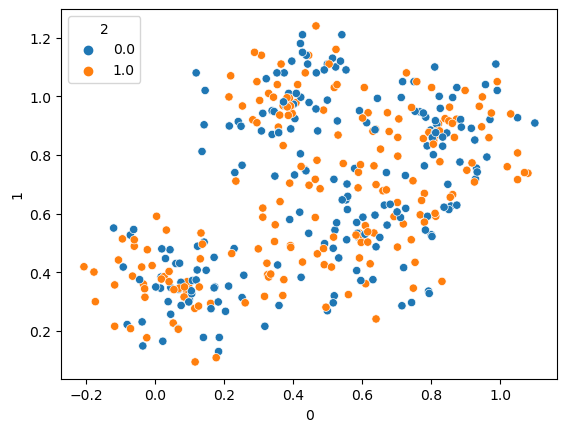

In [7]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [9]:
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [18]:
model=Sequential()
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.007),bias_regularizer=L2(0.003),input_dim=2))
model.add(Dense(5,activation="tanh",kernel_regularizer=L2(0.007),bias_regularizer=L2(0.003)))
model.add(Dense(3,activation="tanh",kernel_regularizer=L2(0.007),bias_regularizer=L2(0.003)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.007),bias_regularizer=L2(0.003)))

In [19]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.01),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
65/65 [==============================] - 2s 12ms/step - loss: 0.8726 - accuracy: 0.4815 - val_loss: 0.8219 - val_accuracy: 0.5556
Epoch 2/20
65/65 [==============================] - 1s 8ms/step - loss: 0.8141 - accuracy: 0.4877 - val_loss: 0.8113 - val_accuracy: 0.4722
Epoch 3/20
65/65 [==============================] - 1s 9ms/step - loss: 0.8074 - accuracy: 0.4753 - val_loss: 0.8096 - val_accuracy: 0.3889
Epoch 4/20
65/65 [==============================] - 1s 8ms/step - loss: 0.8035 - accuracy: 0.4660 - val_loss: 0.8192 - val_accuracy: 0.4167
Epoch 5/20
65/65 [==============================] - 0s 6ms/step - loss: 0.8011 - accuracy: 0.5123 - val_loss: 0.8059 - val_accuracy: 0.4167
Epoch 6/20
65/65 [==============================] - 1s 12ms/step - loss: 0.7992 - accuracy: 0.4784 - val_loss: 0.7981 - val_accuracy: 0.4444
Epoch 7/20
65/65 [==============================] - 1s 10ms/step - loss: 0.7975 - accuracy: 0.5093 - val_loss: 0.8028 - val_accuracy: 0.4444
Epoch 8/20
65/65 

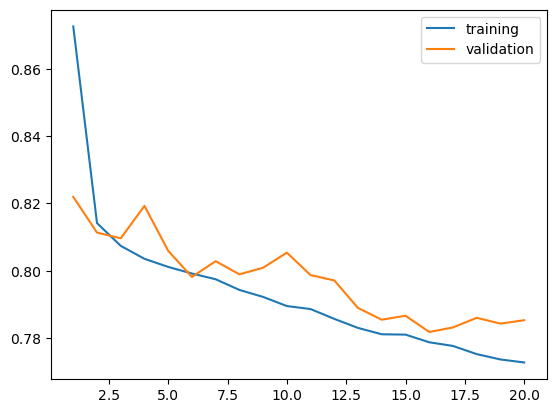

In [20]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 53s 5ms/step


<Axes: >

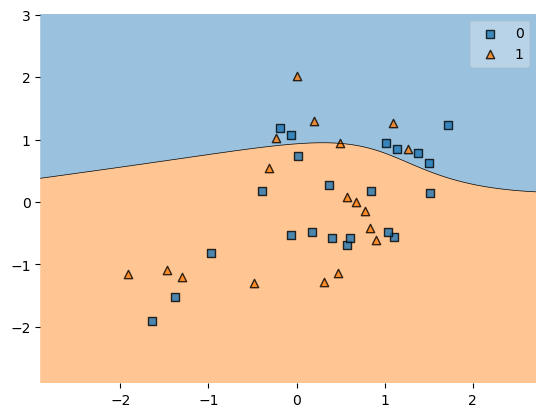

In [21]:
plot_decision_regions(x_testp,y_test.values,clf=model)